## Exploratory Data Analysis

- Which variables have higher impact in the Happiness Score?
- Which countries have make it to the podium to the top/bottom 10 the last 8 years?
- Which countries are in the top/bottom 10%til in happiness?
- Best performing country in each category per year.

https://worldhappiness.report/faq/ # Good explination for Happines Score and Dystopia residual


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final/WorldHappinees2015_2022.csv')
df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
0,2015.0,Switzerland,1.0,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,1.370481,2.51738
1,2015.0,Iceland,2.0,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,1.461513,2.70201
2,2015.0,Denmark,3.0,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,1.403490,2.49204
3,2015.0,Norway,4.0,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,1.401235,2.46531
4,2015.0,Canada,5.0,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,1.340878,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1225,2022.0,Botswana,142.0,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815000,0.18700
1226,2022.0,Rwanda,143.0,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133000,0.53600
1227,2022.0,Zimbabwe,144.0,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690000,0.54800
1228,2022.0,Lebanon,145.0,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498000,0.21600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1230 non-null   float64
 1   Country                    1230 non-null   object 
 2   Happiness Rank             1230 non-null   float64
 3   Happiness Score            1230 non-null   float64
 4   Freedom                    1230 non-null   float64
 5   Generosity                 1230 non-null   float64
 6   Healthy life expectancy    1230 non-null   float64
 7   Perceptions of corruption  1230 non-null   float64
 8   GDP per capita             1230 non-null   float64
 9   Social support             1230 non-null   float64
 10  Dystopia Residual          1230 non-null   float64
dtypes: float64(10), object(1)
memory usage: 105.8+ KB


In [4]:
df.describe()

,Year,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,2016.806730,77.405917,5.424810,0.440827,0.201657,0.607813,0.130875,0.974776,1.068622,1.936019
std,57.589944,44.510535,1.124338,0.154420,0.115541,0.241426,0.110851,0.434528,0.315345,0.669372
min,0.277306,0.277306,0.277306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000
25%,2016.000000,39.000000,4.583250,0.344250,0.118000,0.438798,0.056000,0.667419,0.863673,1.545289
50%,2018.000000,77.000000,5.410000,0.458135,0.187000,0.639167,0.096000,1.011155,1.104576,2.000046
75%,2020.000000,116.000000,6.223000,0.559000,0.258877,0.790795,0.164000,1.295382,1.316465,2.408833
max,2022.000000,158.000000,7.842000,0.740000,0.838075,1.141000,0.587000,2.209000,1.644000,3.837720


In [5]:
relevant_features = ['Freedom', 'Generosity', 'Healthy life expectancy', 'Perceptions of corruption', 'GDP per capita', 'Social support']

### Correlations between Variables

In [6]:
# setting plotting color palette        # blue 5296A5   # red #cf604a  for bivariate analysis
palette = sns.color_palette(palette="blend:#87b7e0,#cf604a")
sns.set_theme(style="ticks", palette=palette, color_codes=True)

/tmp/ipykernel_10258/1134914187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlations between Features')

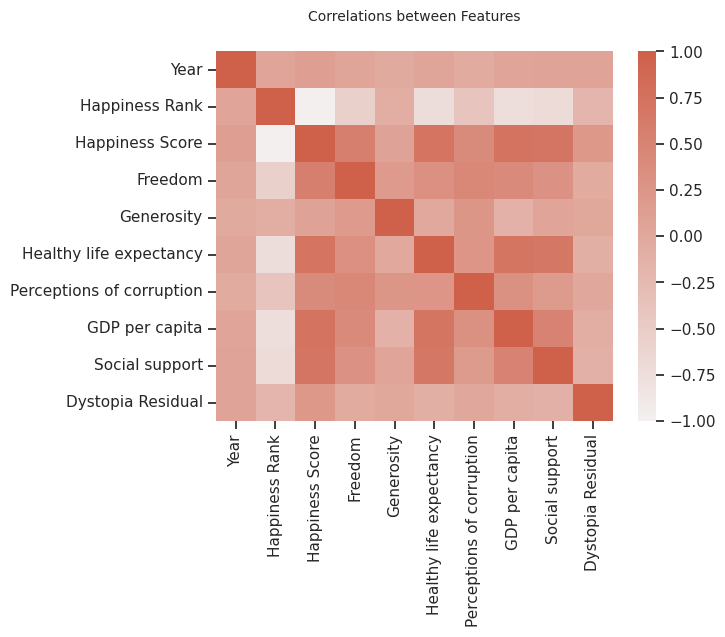

In [7]:
corr = df.corr() 

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette(palette='light:#cf604a', as_cmap=True))
heatmap.set_title('Correlations between Features', fontdict={'fontsize':10}, pad=22)

In [8]:
# Top correlated variables to Happiness Score
corr['Happiness Score'].abs().sort_values(ascending=False)

Happiness Score              1.000000
Happiness Rank               0.972699
GDP per capita               0.741286
Healthy life expectancy      0.726218
Social support               0.702912
Freedom                      0.565390
Perceptions of corruption    0.398539
Dystopia Residual            0.220461
Year                         0.132817
Generosity                   0.088200
Name: Happiness Score, dtype: float64

In [9]:
palette = sns.color_palette(palette="blend:#87b7e0,#cf604a", n_colors=5, desat=None, as_cmap=False)
sns.set_theme(style="ticks", palette=palette, color_codes=True)
# g = sns.pairplot(df) #hue='Country' takes too long

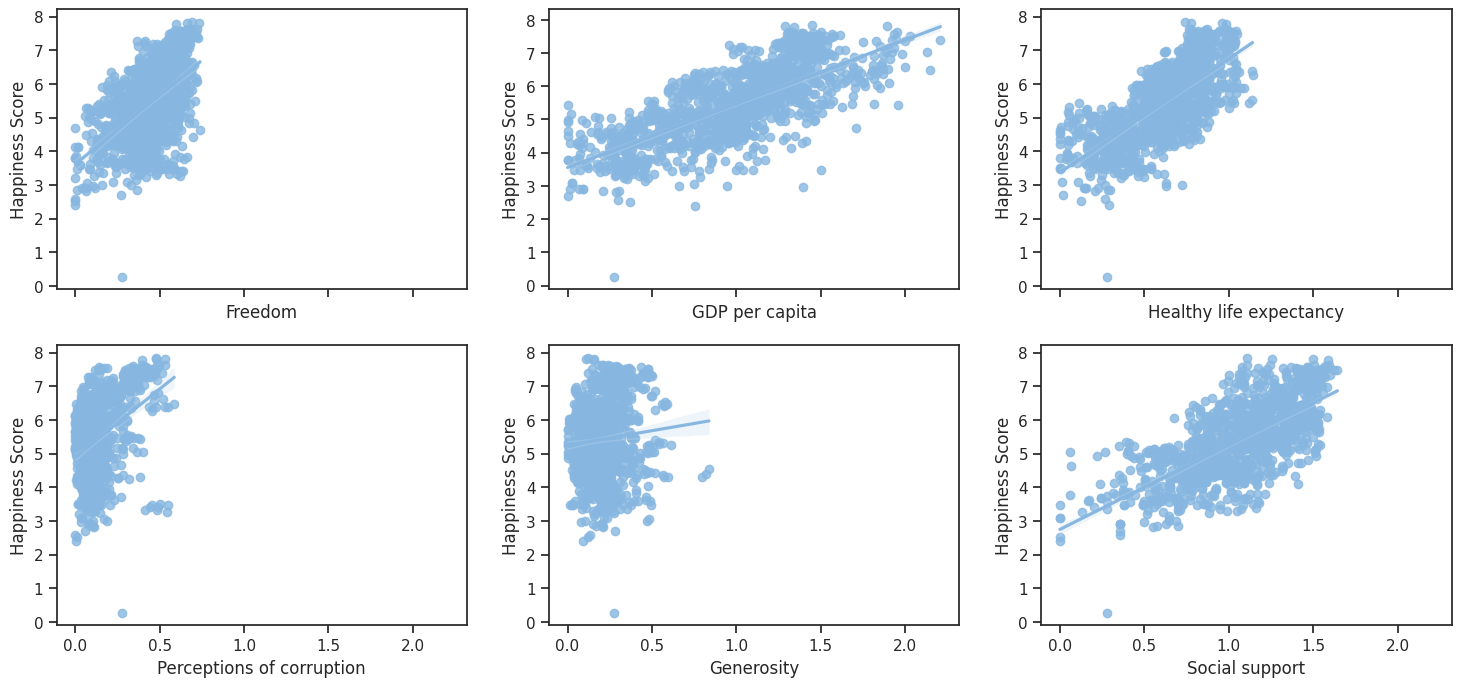

In [10]:
# Check correlation between relevant features and Happiness Score
f, ax = plt.subplots(2, 3, sharex=True, figsize=(18, 8))
for i, key in enumerate(relevant_features):
    sns.regplot(ax=ax[i%2, i%3], data=df, y="Happiness Score", x=key)


### Top Countries

<AxesSubplot: xlabel='Happiness Score'>

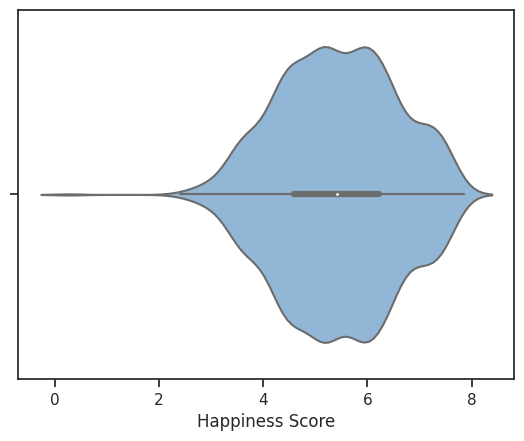

In [11]:
# How does the variable Hapinness Score behave?
sns.violinplot(x=df["Happiness Score"])

#### Top/Bottom 10 by Rank

<AxesSubplot: xlabel='country', ylabel='counts'>

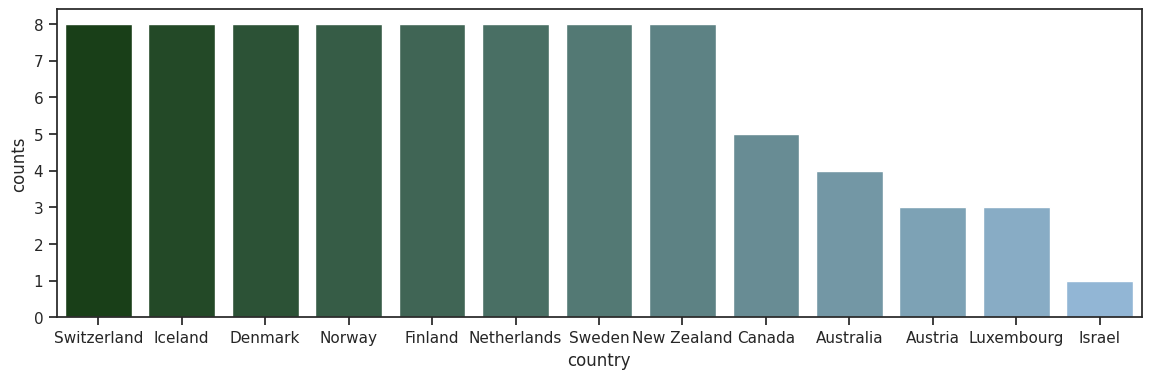

In [12]:
# Countries in the Top 10 podium, 8 years 
top10_eachyear = df.sort_values(['Year', 'Happiness Rank']).groupby('Year').head(10).copy() # Get top 10 for each year
top10_eachyear = top10_eachyear.iloc[1: , :] # remove first std row
top10_eachyear.Year = top10_eachyear.Year.astype(int)

top10_eachyear = top10_eachyear.Country.value_counts().rename_axis('country').reset_index(name='counts')

plt.figure(figsize=(14,4))
sns.barplot(data=top10_eachyear, x="country", y="counts", palette=sns.color_palette(palette='blend:#134611,#87b7e0', n_colors=13)).set(title="No. years countries have been in the top 10")

<AxesSubplot: xlabel='country', ylabel='counts'>

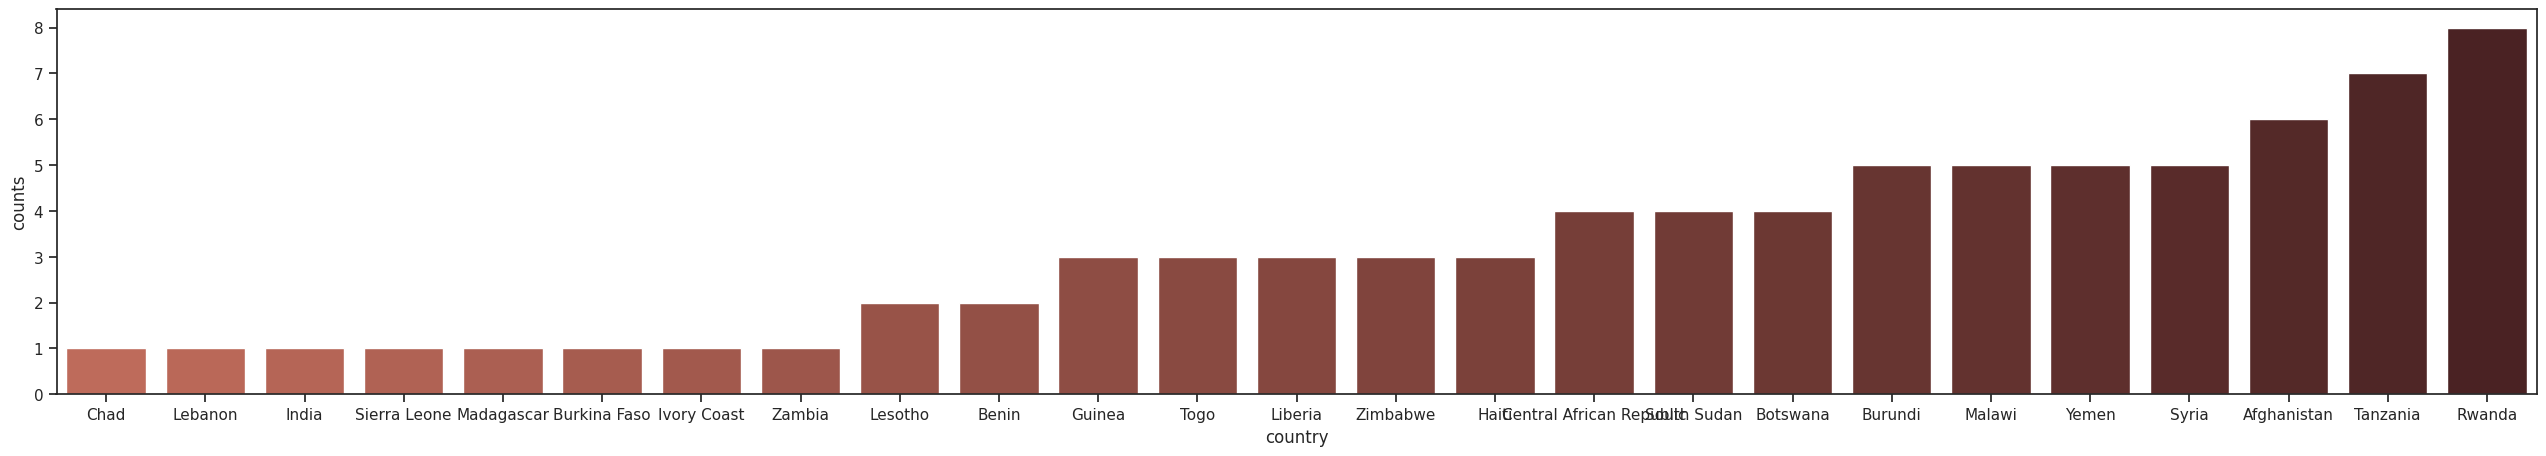

In [21]:
# Bottom 10 countries through out the 8 years 
bottom10_eachyear = df.sort_values(['Year', 'Happiness Rank'], ascending=False).groupby('Year').head(10) # Get bottom 10 for each year
bottom10_eachyear = bottom10_eachyear.iloc[:-1 , :] # remove first std row
bottom10_eachyear.Year = bottom10_eachyear.Year.astype(int)

bottom10_eachyear = bottom10_eachyear.Country.value_counts().rename_axis('Countries').reset_index(name='Years').sort_values('Years')

plt.figure(figsize=(32,5))
# plt.yticks([0, 1, 2, 3, 4])
sns.barplot(data=bottom10_eachyear, x="Countries", y="Years", palette=sns.color_palette(palette='blend:#cf604a,#4C191B', n_colors=26)).set(title="No. years countries have been in the bottom 10 percentil")

#### Top/Bottom 10 Percentile by Score

In [14]:
# Count happy/unhappy countries 
# Lets define as happy/unhappy countries those who have mantain above/bellow threshole over the last 4 years.

# It is known that Happiness Score domain goes from 0 to 10, lets see min and max values in data
df['Happiness Score'].min(), df['Happiness Score'].max(), df['Happiness Score'].quantile(0.1), df['Happiness Score'].quantile(0.9)

(0.2773061545290767, 7.842, 3.9328, 6.985800003051759)

As we can see, there is not one country that can be considered Uthopic or Dystopic, for there is no country with more than 90% score (9-10), or less than 20% (0-1)

In [15]:
# Define thresholes
min_threshole = df['Happiness Score'].quantile(0.1)
max_threshole = df['Happiness Score'].quantile(0.9)

[Text(0.5, 1.0, 'No. years countries have been in the top 10 percentil')]

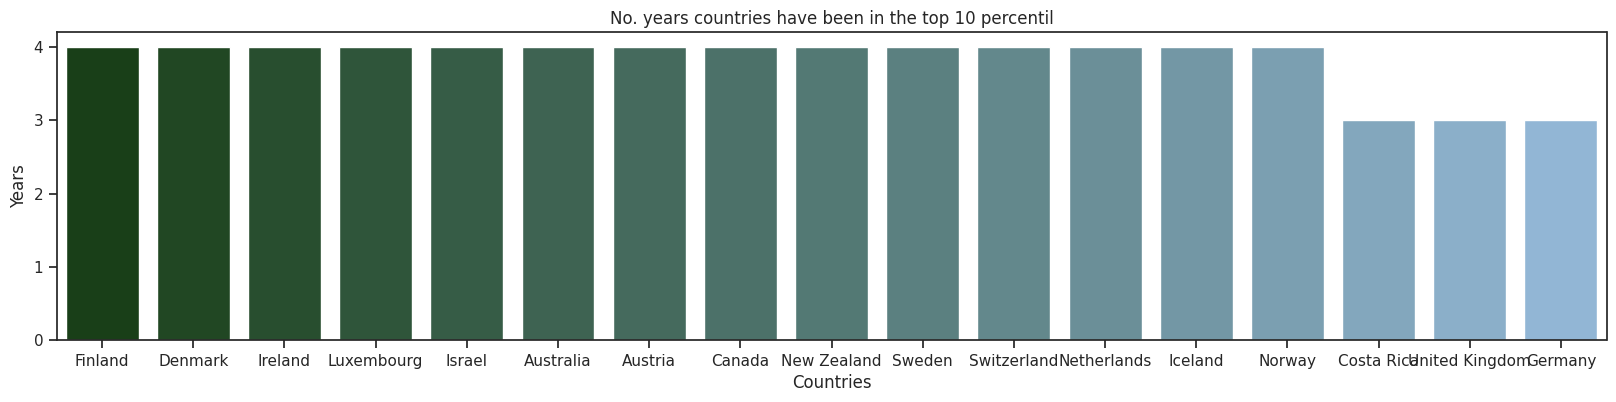

In [25]:
happy_df = df[(df['Happiness Score'] > max_threshole) & (df['Year'] > 2018)]
happy_df = happy_df.Country.value_counts().rename_axis('Countries').reset_index(name='Years')

plt.figure(figsize=(20,4))
plt.yticks([0, 1, 2, 3, 4])

sns.barplot(data=happy_df, x="Countries", y="Years", palette=sns.color_palette(palette='blend:#134611,#87b7e0', n_colors=17)).set(title="No. years countries have been in the top 10 percentil")

[Text(0.5, 1.0, 'No years countries have been in the bottom 10 percentil')]

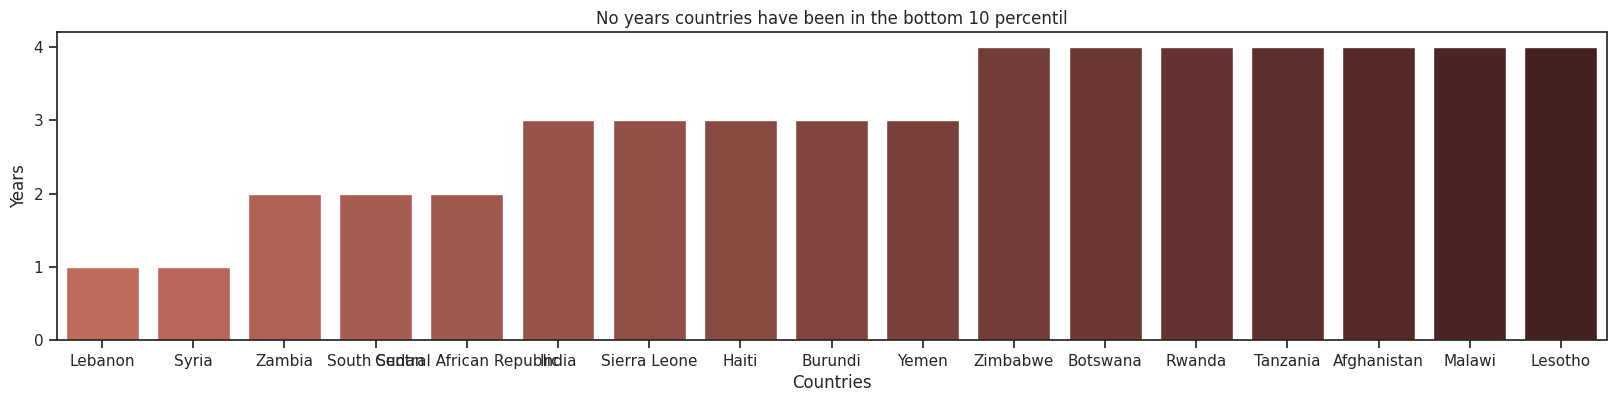

In [27]:
unhappy_df = df[(df['Happiness Score'] < min_threshole) & (df['Year'] > 2018)]
unhappy_df = unhappy_df.Country.value_counts().rename_axis('Countries').reset_index(name='Years').sort_values('Years')

plt.figure(figsize=(20,4))
plt.yticks([0, 1, 2, 3, 4])
sns.barplot(data=unhappy_df, x="Countries", y="Years", palette=sns.color_palette(palette='blend:#cf604a,#4C191B', n_colors=17)).set(title="No years countries have been in the bottom 10 percentil")

#### Best Countries by Category in average

[Text(0.5, 1.0, 'No years countries have been in the bottom 10 percentil')]

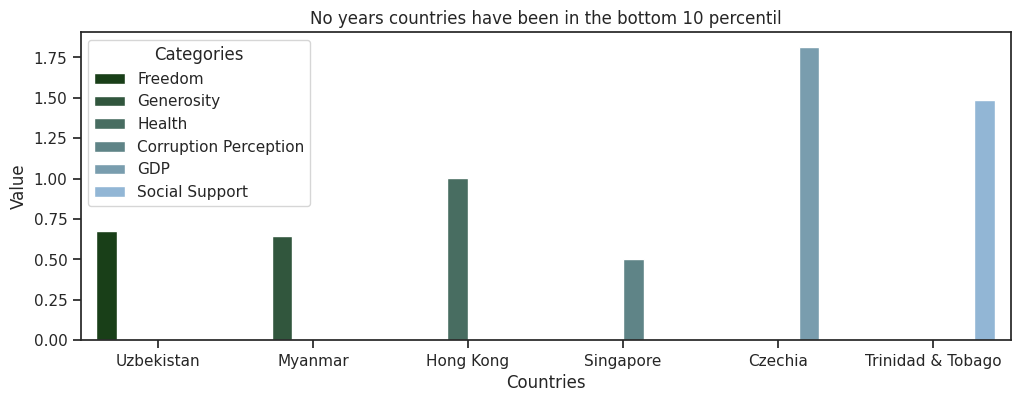

In [72]:
# Best performing country in each category: calculated by 

freedom = df.groupby('Country').mean().sort_values('Freedom', ascending=False).head(1).rename({'Freedom' : 'Value'}, axis=1)[['Value']].assign(Categories='Freedom')
generosity = df.groupby('Country').mean().sort_values('Generosity', ascending=False).head(1).rename({'Generosity' : 'Value'}, axis=1)[['Value']].assign(Categories='Generosity')
health = df.groupby('Country').mean().sort_values('Healthy life expectancy', ascending=False).head(1).rename({'Healthy life expectancy' : 'Value'}, axis=1)[['Value']].assign(Categories='Health')
corruption = df.groupby('Country').mean().sort_values('Perceptions of corruption', ascending=False).head(1).rename({'Perceptions of corruption' : 'Value'}, axis=1)[['Value']].assign(Categories='Corruption Perception')
gpd = df.groupby('Country').mean().sort_values('GDP per capita', ascending=False).head(1).rename({'GDP per capita' : 'Value'}, axis=1)[['Value']].assign(Categories='GDP')
social = df.groupby('Country').mean().sort_values('Social support', ascending=False).head(1).rename({'Social support' : 'Value'}, axis=1)[['Value']].assign(Categories='Social Support')

top = pd.concat([freedom, generosity, health, corruption, gpd, social]).rename_axis('Countries').reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=top, x="Countries", y="Value", hue='Categories', palette=sns.color_palette(palette='blend:#134611,#87b7e0', n_colors=6)).set(title="No years countries have been in the bottom 10 percentil")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


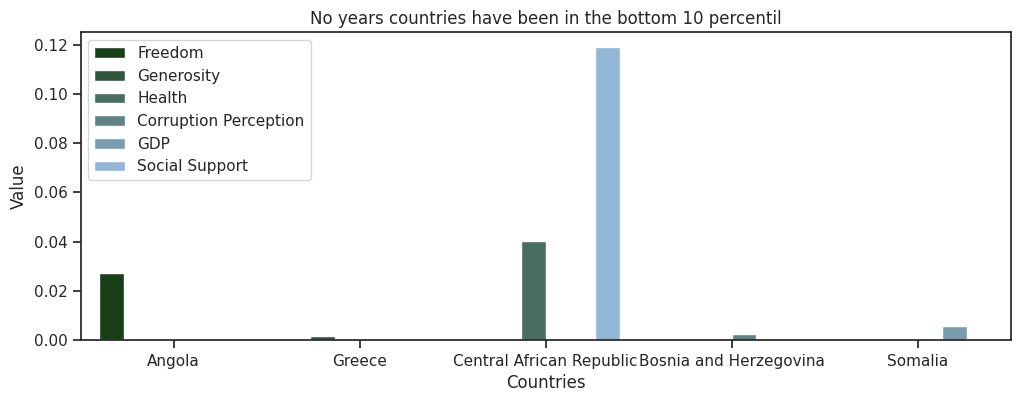

In [81]:
# Best performing country in each category: calculated by 

#  Group by Country, calculate the mean of all 6 variables in all years, sort by the category, take the first, now rename the category so all have the same name to later concat, and assign a column category
freedom = df.groupby('Country').mean().sort_values('Freedom').head(1).rename({'Freedom' : 'Value'}, axis=1)[['Value']].assign(Categories='Freedom')
generosity = df.groupby('Country').mean().sort_values('Generosity').head(1).rename({'Generosity' : 'Value'}, axis=1)[['Value']].assign(Categories='Generosity')
health = df.groupby('Country').mean().sort_values('Healthy life expectancy').head(1).rename({'Healthy life expectancy' : 'Value'}, axis=1)[['Value']].assign(Categories='Health')
corruption = df.groupby('Country').mean().sort_values('Perceptions of corruption').head(1).rename({'Perceptions of corruption' : 'Value'}, axis=1)[['Value']].assign(Categories='Corruption Perception')
gpd = df.groupby('Country').mean().sort_values('GDP per capita').head(1).rename({'GDP per capita' : 'Value'}, axis=1)[['Value']].assign(Categories='GDP')
social = df.groupby('Country').mean().sort_values('Social support').head(1).rename({'Social support' : 'Value'}, axis=1)[['Value']].assign(Categories='Social Support')

bottom = pd.concat([freedom, generosity, health, corruption, gpd, social]).rename_axis('Countries').reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=bottom, x="Countries", y="Value", hue='Categories', palette=sns.color_palette(palette='blend:#134611,#87b7e0', n_colors=6)).set(title="No years countries have been in the bottom 10 percentil")
plt.legend(loc='upper left')

## Summary

**Which variables have higher impact in the Happiness Score?**
- GDP per capita               0.742521
- Healthy life expectancy      0.727705
- Social support               0.623557

**Which countries have remained in the top 10 and bottom 10 through out the last 8 years?**

Top
- Finland        8
- Denmark        8
- Iceland        8
- Switzerland    8
- Netherlands    8
- Sweden         8
- Norway         8
- New Zealand    8

Bottom
- Rwanda           8 only Rwanda has been in the botton 10 every year
- Tanzania         7
- Afghanistan      6

**Top/Bottom 10%til **

10%til Happy
- Finland           4
- Denmark           4
- Ireland           4
- Luxembourg        4
- Israel            4
- Australia         4
- Austria           4
- Canada            4
- New Zealand       4
- Sweden            4
- Switzerland       4
- Netherlands       4
- Iceland           4
- Norway            4
- Costa Rica        3
- United Kingdom    3
- Germany           3


10%til Unhappy
- Rwanda                      4
- Zimbabwe                    4
- Botswana                    4
- Malawi                      4
- Lesotho                     4
- Tanzania                    4
- Afghanistan                 4
- Burundi                     3
- Haiti                       3
- India                       3
- Yemen                       3
- Sierra Leone                3

**Best performing country in each category per year by average**

In [85]:
top

,Countries,Value,Categories
0,Uzbekistan,0.675651,Freedom
1,Myanmar,0.644935,Generosity
2,Hong Kong,1.004093,Health
3,Singapore,0.500430,Corruption Perception
4,Czechia,1.815000,GDP
5,Trinidad & Tobago,1.484500,Social Support


In [86]:
bottom

,Countries,Value,Categories
0,Angola,0.027433,Freedom
1,Greece,0.001875,Generosity
2,Central African Republic,0.040153,Health
3,Bosnia and Herzegovina,0.002555,Corruption Perception
4,Somalia,0.005661,GDP
5,Central African Republic,0.119040,Social Support
